In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the file path
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data"

# Define column names
cols = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"] + [f"Wilderness_Area{i}" for i in range(1,5)] + [f"Soil_Type{i}" for i in range(1,41)] + ["Cover_Type"]

# Use read_csv to open the CSV file into a pandas dataframe
df = pd.read_csv(url, header=None, names=cols, compression='gzip')


Visualize the distribution of the target variable:

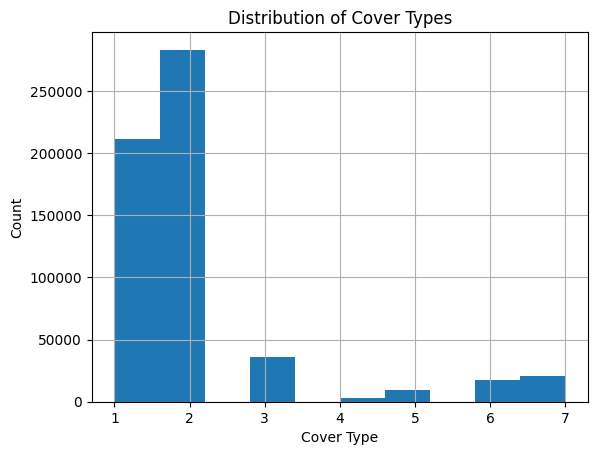

In [ ]:
df.Cover_Type.hist()
plt.title("Distribution of Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()


Plot a scatter matrix of a subset of features:

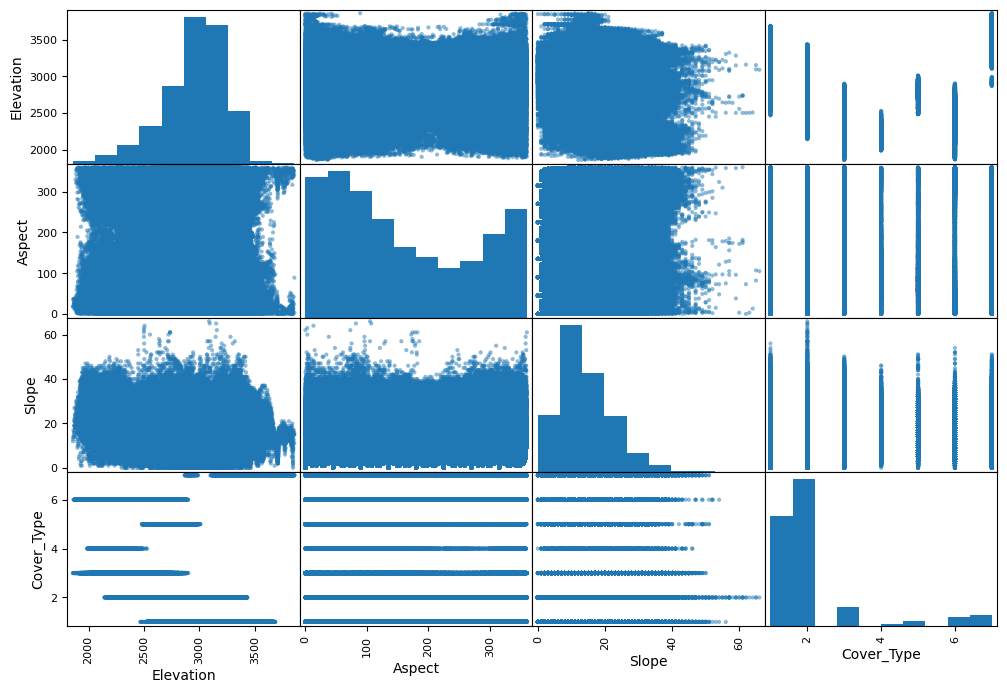

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Elevation", "Aspect", "Slope", "Cover_Type"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()


Plot a scatter plot of two features:

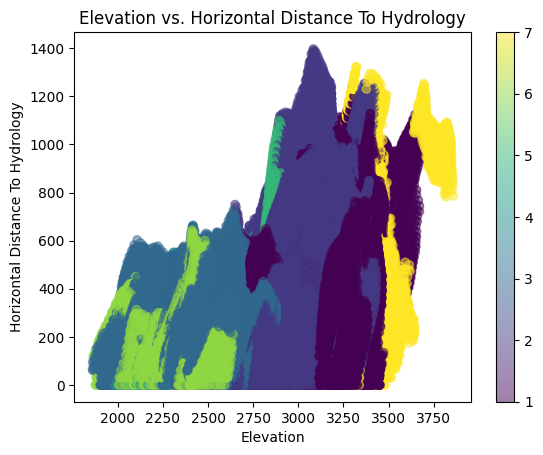

In [ ]:
plt.scatter(df.Elevation, df.Horizontal_Distance_To_Hydrology, c=df.Cover_Type, alpha=0.5)
plt.title("Elevation vs. Horizontal Distance To Hydrology")
plt.xlabel("Elevation")
plt.ylabel("Horizontal Distance To Hydrology")
plt.colorbar()
plt.show()


Plot a histogram of a feature

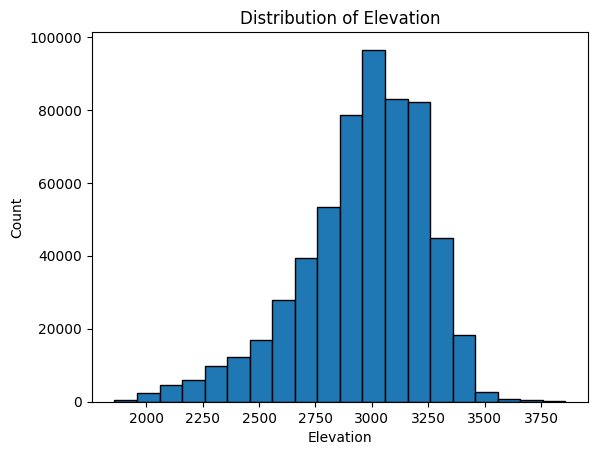

In [ ]:
plt.hist(df.Elevation, bins=20, edgecolor="black")
plt.title("Distribution of Elevation")
plt.xlabel("Elevation")
plt.ylabel("Count")
plt.show()


Plot a boxplot of a feature:

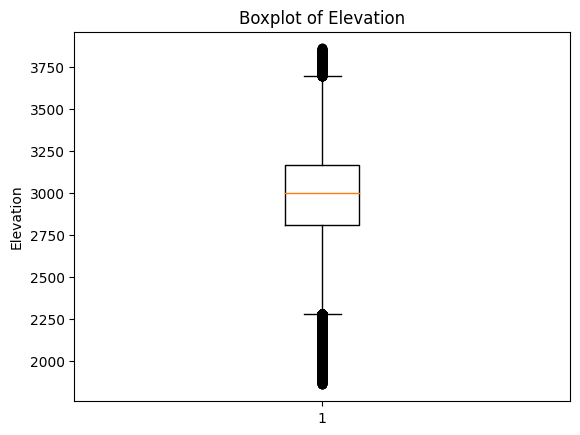

In [ ]:
plt.boxplot(df.Elevation)
plt.title("Boxplot of Elevation")
plt.ylabel("Elevation")
plt.show()


Plot a stacked bar chart of the number of instances in each cover type by wilderness area:

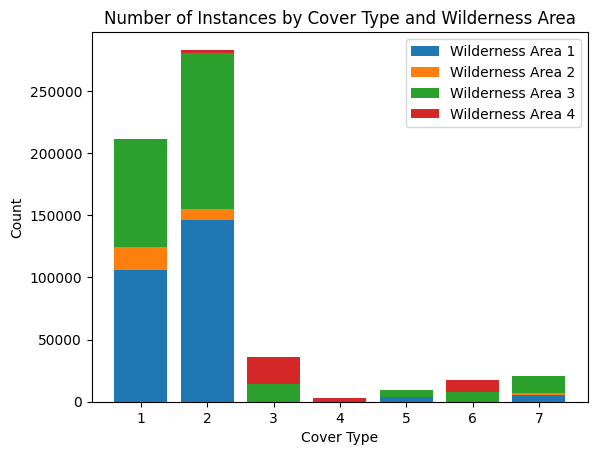

In [ ]:
wilderness_areas = ["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"]
cover_types = sorted(df.Cover_Type.unique())
data = []
for area in wilderness_areas:
    area_data = []
    for cover_type in cover_types:
        area_data.append(len(df[(df[area] == 1) & (df.Cover_Type == cover_type)]))
    data.append(area_data)
data = np.array(data)
fig, ax = plt.subplots()
ax.bar(cover_types, data[0], label="Wilderness Area 1")
ax.bar(cover_types, data[1], bottom=data[0], label="Wilderness Area 2")
ax.bar(cover_types, data[2], bottom=data[0]+data[1], label="Wilderness Area 3")
ax.bar(cover_types, data[3], bottom=data[0]+data[1]+data[2], label="Wilderness Area 4")
ax.set_xlabel("Cover Type")
ax.set_ylabel("Count")
ax.set_title("Number of Instances by Cover Type and Wilderness Area")
ax.legend()
plt.show()


Plot a scatter plot matrix of several features:

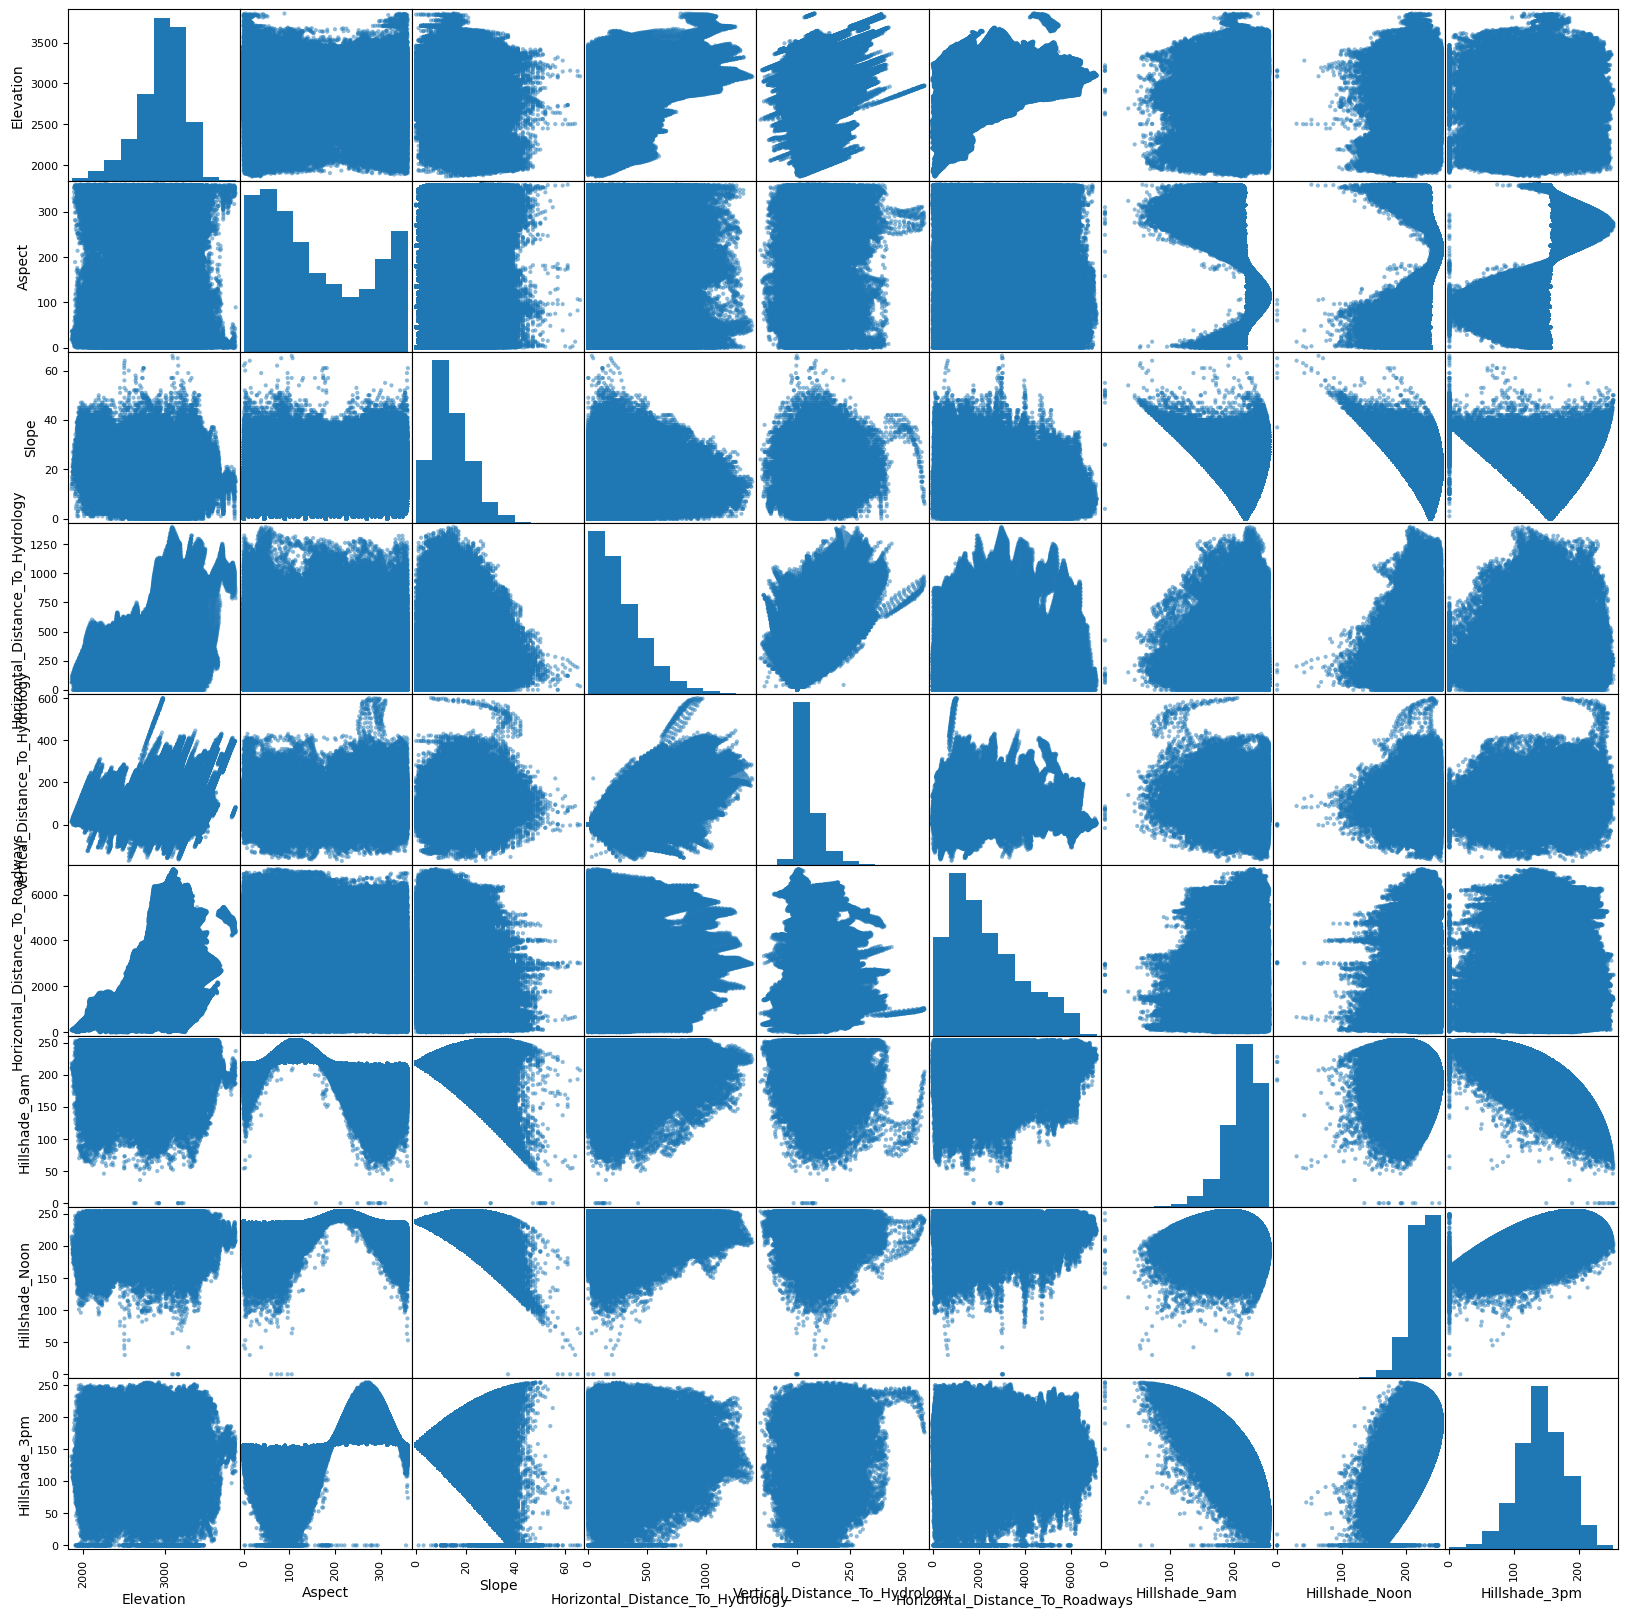

In [ ]:
attributes = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
              "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
              "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]
scatter_matrix(df[attributes], figsize=(20, 20))
plt.show()


Plot a line plot of the counts of cover types by elevation:

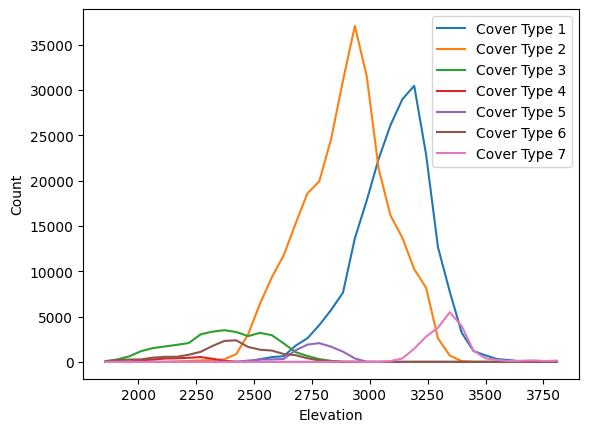

In [ ]:
cover_types = range(1, 8)
n_bins = 39
elevation_bins = np.linspace(df["Elevation"].min(), df["Elevation"].max(), n_bins+1)
counts = np.zeros((n_bins, len(cover_types)))
for i, cover_type in enumerate(cover_types):
    subset = df[df["Cover_Type"] == cover_type]
    counts[:, i], _ = np.histogram(subset["Elevation"], bins=elevation_bins)

# Plot the histogram of elevations by cover type
fig, ax = plt.subplots()
for cover_type in cover_types:
    cover_type_counts = counts[:, cover_type-1]
    ax.plot(elevation_bins[:-1], cover_type_counts, label=f"Cover Type {cover_type}")
ax.set_xlabel("Elevation")
ax.set_ylabel("Count")
ax.legend()
plt.show()

Plot a scatter plot of two features with a regression line:

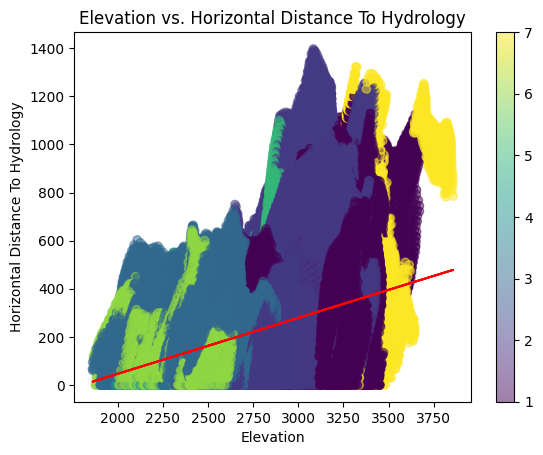

In [ ]:
from scipy.stats import linregress
x = df.Elevation
y = df.Horizontal_Distance_To_Hydrology
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
line = slope * x + intercept
plt.scatter(x, y, c=df.Cover_Type, alpha=0.5)
plt.plot(x, line, color="red")
plt.title("Elevation vs. Horizontal Distance To Hydrology")
plt.xlabel("Elevation")
plt.ylabel("Horizontal Distance To Hydrology")
plt.colorbar()
plt.show()


Plot a scatter plot of two features with different markers and colors for each cover type:

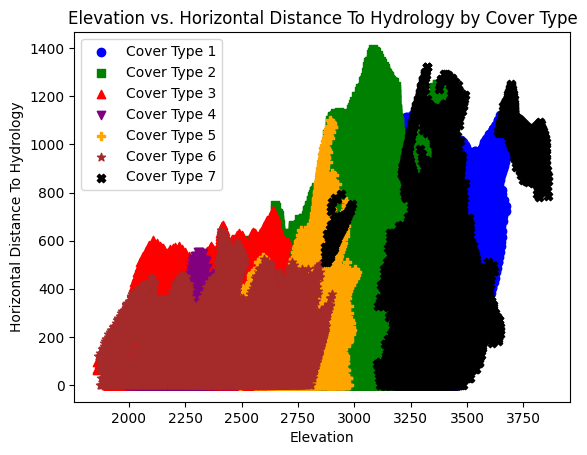

In [ ]:
x = df.Elevation
y = df.Horizontal_Distance_To_Hydrology
markers = ["o", "s", "^", "v", "P", "*", "X"]
colors = ["blue", "green", "red", "purple", "orange", "brown", "black"]
fig, ax = plt.subplots()
for i, cover_type in enumerate(cover_types):
    mask = df.Cover_Type == cover_type
    ax.scatter(x[mask], y[mask], marker=markers[i], color=colors[i], label=f"Cover Type {cover_type}")
ax.set_xlabel("Elevation")
ax.set_ylabel("Horizontal Distance To Hydrology")
ax.set_title("Elevation vs. Horizontal Distance To Hydrology by Cover Type")
ax.legend()
plt.show()


Plot a hexbin plot of two features:

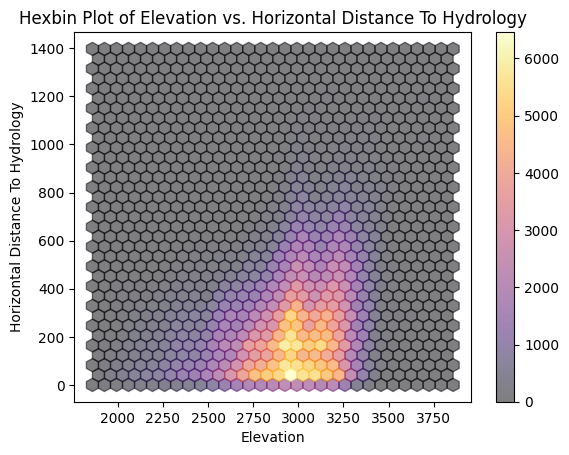

In [ ]:
x = df.Elevation
y = df.Horizontal_Distance_To_Hydrology
plt.hexbin(x, y, gridsize=30, cmap="inferno", alpha=0.5)
plt.colorbar()
plt.xlabel("Elevation")
plt.ylabel("Horizontal Distance To Hydrology")
plt.title("Hexbin Plot of Elevation vs. Horizontal Distance To Hydrology")
plt.show()


Plot a kernel density estimate plot of a feature:

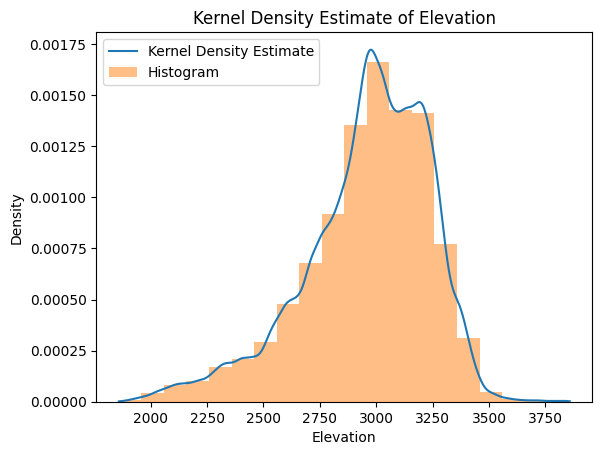

In [ ]:
from scipy.stats import gaussian_kde
density = gaussian_kde(df.Elevation)
xs = np.linspace(df.Elevation.min(), df.Elevation.max(), 1000)
plt.plot(xs, density(xs), label="Kernel Density Estimate")
plt.hist(df.Elevation, bins=20, density=True, alpha=0.5, label="Histogram")
plt.xlabel("Elevation")
plt.ylabel("Density")
plt.title("Kernel Density Estimate of Elevation")
plt.legend()
plt.show()


Plot a scatter plot of three features with different sizes and colors for each cover type:

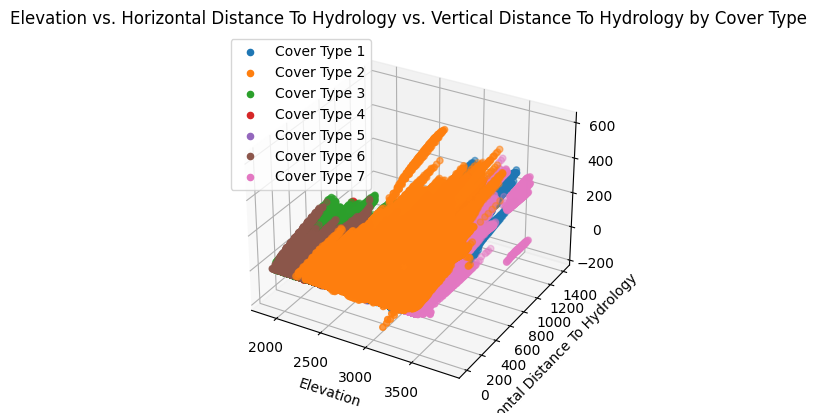

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for cover_type in cover_types:
    subset = df[df["Cover_Type"] == cover_type]
    ax.scatter(subset["Elevation"], subset["Horizontal_Distance_To_Hydrology"], subset["Vertical_Distance_To_Hydrology"], label=f"Cover Type {cover_type}")
ax.set_xlabel("Elevation")
ax.set_ylabel("Horizontal Distance To Hydrology")
ax.set_title("Elevation vs. Horizontal Distance To Hydrology vs. Vertical Distance To Hydrology by Cover Type")
ax.legend()
plt.show()


Plot a pie chart of the number of instances of each cover type:

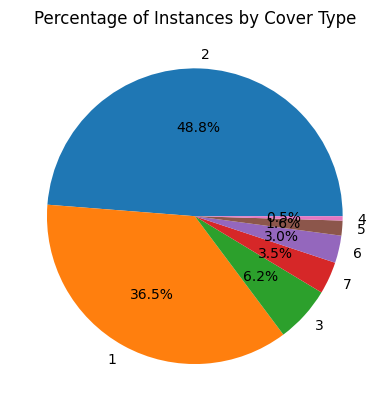

In [ ]:
counts = df.Cover_Type.value_counts()
plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%")
plt.title("Percentage of Instances by Cover Type")
plt.show()


Plot a violin plot of a feature:

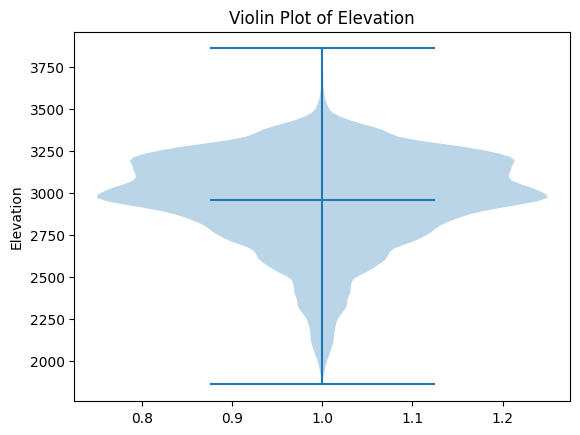

In [ ]:
plt.violinplot(df.Elevation, showmeans=True)
plt.title("Violin Plot of Elevation")
plt.ylabel("Elevation")
plt.show()

Plot a stacked bar chart of the number of instances of each cover type by wilderness area:

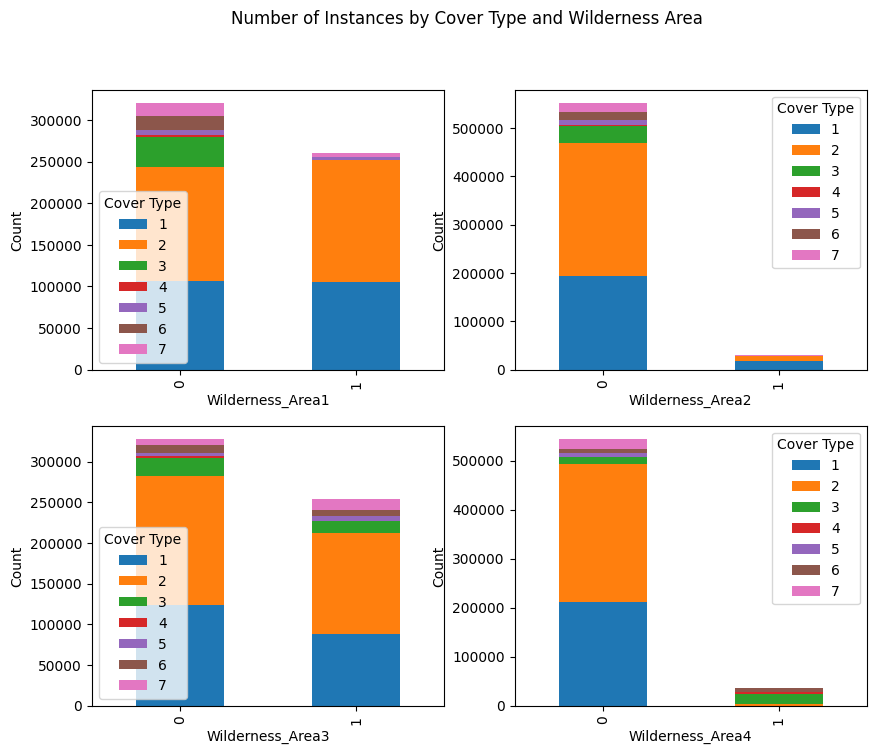

In [ ]:
wilderness_areas = ["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"]
counts_by_area = []
for area in wilderness_areas:
    counts_by_area.append(df.groupby([area, "Cover_Type"]).size().unstack(fill_value=0))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs = axs.flatten()
for i, area in enumerate(wilderness_areas):
    counts_by_area[i].plot(kind="bar", stacked=True, ax=axs[i])
    axs[i].set_xlabel(area)
    axs[i].set_ylabel("Count")
    axs[i].legend(title="Cover Type")
fig.suptitle("Number of Instances by Cover Type and Wilderness Area")
plt.show()


Plot a box plot of a feature by cover type:

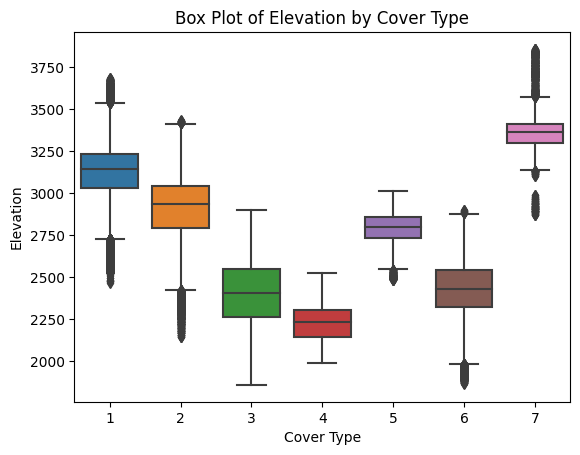

In [ ]:
sns.boxplot(x="Cover_Type", y="Elevation", data=df)
plt.title("Box Plot of Elevation by Cover Type")
plt.xlabel("Cover Type")
plt.ylabel("Elevation")
plt.show()


Plot a scatter plot of two features with different marker colors by cover type:

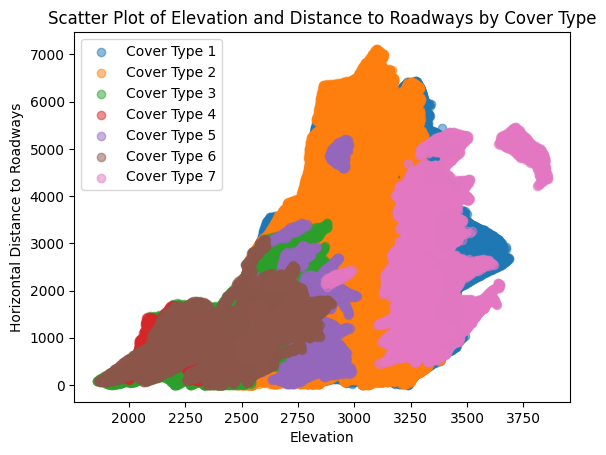

In [ ]:
for i in range(1, 8):
    subset = df[df["Cover_Type"] == i]
    plt.scatter(subset["Elevation"], subset["Horizontal_Distance_To_Roadways"], label=f"Cover Type {i}", alpha=0.5)
plt.title("Scatter Plot of Elevation and Distance to Roadways by Cover Type")
plt.xlabel("Elevation")
plt.ylabel("Horizontal Distance to Roadways")
plt.legend()
plt.show()


Plot a histogram of a feature with different colored bars by cover type:

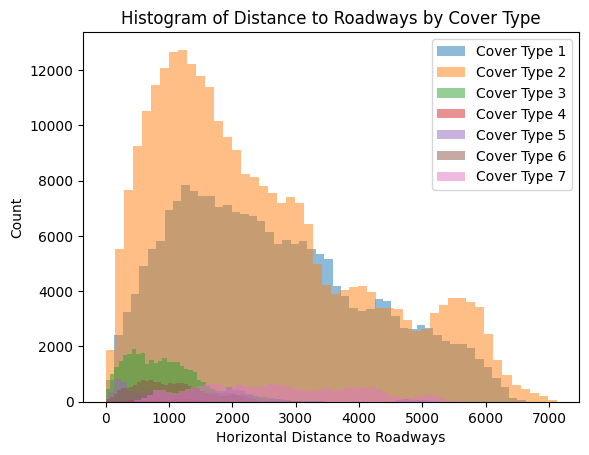

In [ ]:
for i in range(1, 8):
    subset = df[df["Cover_Type"] == i]
    plt.hist(subset["Horizontal_Distance_To_Roadways"], bins=50, alpha=0.5, label=f"Cover Type {i}")
plt.title("Histogram of Distance to Roadways by Cover Type")
plt.xlabel("Horizontal Distance to Roadways")
plt.ylabel("Count")
plt.legend()
plt.show()


Plot a violin plot of a feature by cover type:

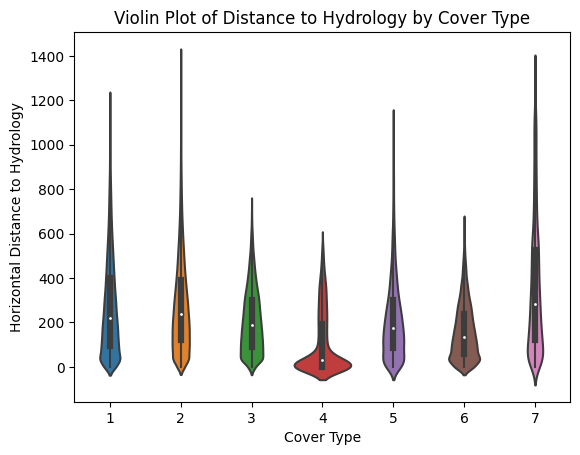

In [ ]:
sns.violinplot(x="Cover_Type", y="Horizontal_Distance_To_Hydrology", data=df)
plt.title("Violin Plot of Distance to Hydrology by Cover Type")
plt.xlabel("Cover Type")
plt.ylabel("Horizontal Distance to Hydrology")
plt.show()


Plot a hexbin plot of two features:

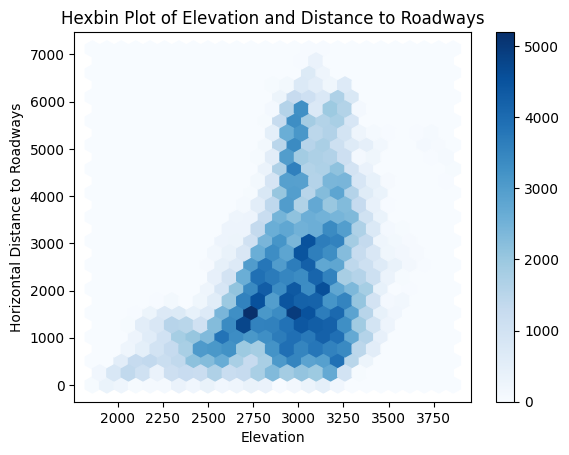

In [ ]:
plt.hexbin(df["Elevation"], df["Horizontal_Distance_To_Roadways"], gridsize=25, cmap="Blues")
plt.title("Hexbin Plot of Elevation and Distance to Roadways")
plt.xlabel("Elevation")
plt.ylabel("Horizontal Distance to Roadways")
plt.colorbar()
plt.show()

Plot a scatter plot of two features with different colors by cover type and a legend:

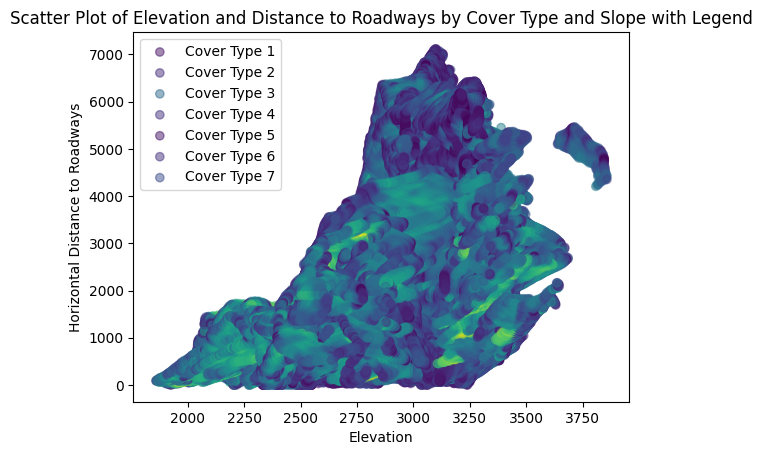

In [ ]:
for i in range(1, 8):
    subset = df[df["Cover_Type"] == i]
    plt.scatter(subset["Elevation"], subset["Horizontal_Distance_To_Roadways"], c=subset["Slope"], alpha=0.5, label=f"Cover Type {i}")
plt.title("Scatter Plot of Elevation and Distance to Roadways by Cover Type and Slope with Legend")
plt.xlabel("Elevation")
plt.ylabel("Horizontal Distance to Roadways")
plt.legend()
plt.show()

Plot a kernel density estimate of a feature by cover type:

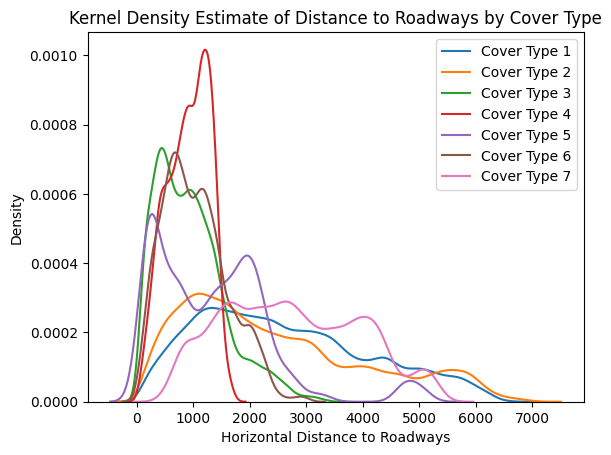

In [ ]:
for i in range(1, 8):
    subset = df[df["Cover_Type"] == i]
    sns.kdeplot(subset["Horizontal_Distance_To_Roadways"], label=f"Cover Type {i}")
plt.title("Kernel Density Estimate of Distance to Roadways by Cover Type")
plt.xlabel("Horizontal Distance to Roadways")
plt.ylabel("Density")
plt.legend()
plt.show()

Plot a line chart of the mean value of a feature by cover type and month:

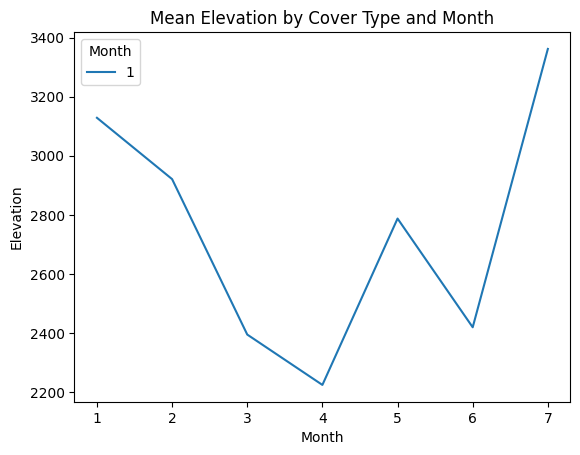

In [72]:
df["Month"] = df.index.month # assuming the index represents time
means_by_cover_type_and_month = df.groupby(["Cover_Type", "Month"]).mean()["Elevation"].unstack()
means_by_cover_type_and_month.plot()
plt.title("Mean Elevation by Cover Type and Month")
plt.xlabel("Month")
plt.ylabel("Elevation")
plt.show()
